In [3]:
import numpy as np
from scipy.special import gamma
import os

## Directory

In [6]:
dir_fig = "../../figures/fractal-dimension/"
os.listdir(dir_fig)
filename = dir_fig + "n_star_plot.pdf"

## Function definitions

In [7]:
n_star = np.linspace(0,1,100_001)

def func_trans(n_star,alpha,p):
    """left-hand side of transcendental equation defined as a numpy array"""
    return (gamma(n_star+alpha)*gamma(2*alpha))/(gamma(n_star+2*alpha)*gamma(alpha))-1/(1+p)

In [8]:
def find_df(alpha,p):
    """root finding by minimizing the cost function: square of left-hanad side"""
    cost_array = func_trans(n_star,alpha,p)**2
    min_index = np.argmin(cost_array)
    df_value = n_star[min_index]
    df_rounded = float("{:.6f}".format(df_value))
    return df_rounded

In [9]:
def plot_data(alpha_min,alpha_max,p):
    alpha_array = np.linspace(alpha_min,alpha_max,1_000)
    df_array = []
    for i in alpha_array:
        df_value = find_df(i,p)
        df_array.append(df_value)
    return alpha_array, np.array(df_array)

## Plotting $n^*$ vs $\alpha$

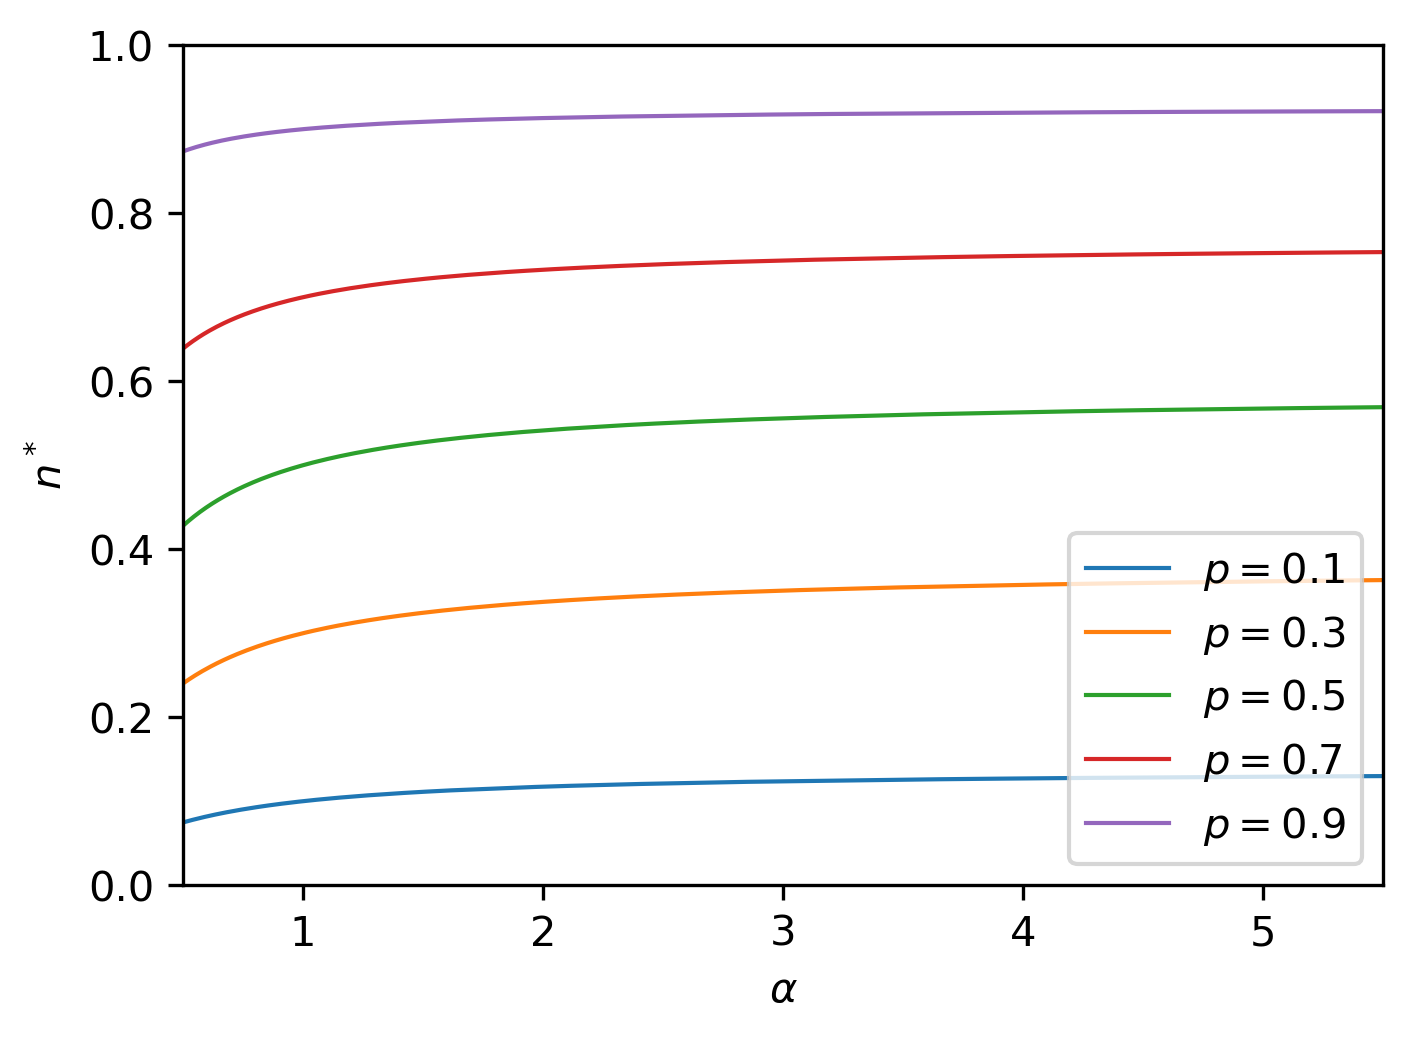

In [10]:
import matplotlib.pyplot as plt

alpha_min = 0.5
alpha_max = 5.5

fig, ax = plt.subplots(1, 1, figsize=(5, 3.5), dpi=300)
p_values = [0.1, 0.3, 0.5, 0.7, 0.9]

for p in p_values:
    x, y = plot_data(alpha_min,alpha_max,p)
    plt.plot(x, y, label=r"$p={:.1f}$".format(p), linewidth=1)
    pass

plt.legend(loc=4)
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$n^*$")
plt.xlim([alpha_min, alpha_max])
plt.ylim([0, 1])
ax.set_position([0.15, 0.15, 0.8, 0.8])
print(filename)
plt.savefig(filename)